In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
def create_translation_dic(sheet_name):
    codebook_df = pd.read_excel("~/chile_data_admissions/codebook_PSU.xlsx", sheet_name)
    temp_df = codebook_df[codebook_df['Variable'].notna()]
    spanish_key = temp_df["Variable"]
    english_key = temp_df['Description (English)']
    dic = dict(zip(spanish_key, english_key))
    return dic

relevant_keys=['Unique code for program',
               'Year of admission as a freshman',
               'Semester of admission as a freshman',
               'Name of the title conferred to the student',
               'Date of the title (YYYYMMDD)',
               'Total theoretical duration of the degree (in semesters)']

In [3]:
def get_df(adm_year, grad_mapper):
    all_df = []
    for i in tqdm(range(2007, 2021)):
        # Read in data
        df = pd.read_csv("~/chile_data_graduation/Titulados-de-Educacion-Superior-{}/Titulados_Educacion_Superior_{}.csv".format(i,i), sep=";",
                        dtype={"MRUN": 'str' , "EDAD_ALU":'str', 'cod_carrera': 'str', 'version': 'str', 'cod_sede':'str', 
                               'dur_estudio_carr':'str', 'dur_proceso_tit':'str', 'dur_total_carr':'str' })
        # Replace empty strings with NaN
        df = df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
        
        # Translate columns
        df.columns = map(str.upper, df.columns)
        df = df.rename(columns=grad_mapper)
        
        
        # Drop rows that have NaN in important columns
        df = df[df['Year of admission as a freshman'].notna()]
        df = df[df['Semester of admission as a freshman'].notna()]
        df = df[df['Date of the title (YYYYMMDD)'].notna()]
        df = df[df['Total theoretical duration of the degree (in semesters)'].notna()]
        
        #Only look at students with admission year equal to adm_year
        df = df[df['Year of admission as a freshman']==adm_year]
        df = df[relevant_keys]
        df.reset_index(inplace=True, drop=True)
        all_df.append(df)
        
    main_df = pd.concat(all_df, ignore_index=True)
    return main_df

In [4]:
def graduate_on_time(df):
    adm_year = df['Year of admission as a freshman'].astype("int").to_numpy()
    deg_date = df['Date of the title (YYYYMMDD)']
    length_degree = df['Total theoretical duration of the degree (in semesters)'].astype("int").to_numpy()/2
    deg_year = np.array([int(str(x)[:4]) for x in deg_date])
    on_time_grad = ((deg_year - adm_year) <= length_degree)
    if len(on_time_grad) > 1:
        grad_rate = sum(on_time_grad)/len(on_time_grad)
    else:
        grad_rate = 0.
    n_total = len(on_time_grad) 
    
    return grad_rate, n_total

In [5]:
years = list(range(2003, 2018))
totals = []
grad_rates = []
grad_mapper = create_translation_dic("Graduation")

for year in years:
    print(year)
    df = get_df(year,  grad_mapper=grad_mapper)
    grad_rate, n_total = graduate_on_time(df)
    grad_rates.append(grad_rate)
    totals.append(n_total)

2003


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.13s/it]


2004


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.05s/it]


2005


100%|███████████████████████████████████████████| 14/14 [01:23<00:00,  5.99s/it]


2006


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.07s/it]


2007


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.05s/it]


2008


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.08s/it]


2009


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.06s/it]


2010


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.07s/it]


2011


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.06s/it]


2012


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.04s/it]


2013


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.10s/it]


2014


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.09s/it]


2015


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.10s/it]


2016


100%|███████████████████████████████████████████| 14/14 [01:24<00:00,  6.04s/it]


2017


100%|███████████████████████████████████████████| 14/14 [01:25<00:00,  6.08s/it]


Text(0, 0.5, 'Graduation Rate of Admitted Class')

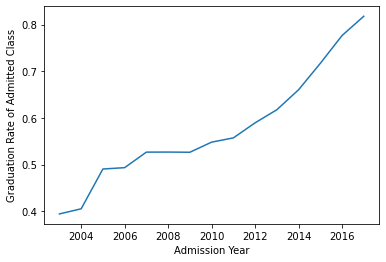

In [12]:
plt.plot(years, grad_rates)
plt.xlabel("Admission Year")
plt.ylabel("Graduation Rate of Admitted Class")

Text(0, 0.5, 'Number of Students in Admitted Class')

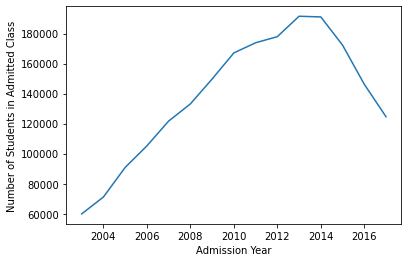

In [13]:
plt.plot(years, totals)
plt.xlabel("Admission Year")
plt.ylabel("Number of Students in Admitted Class")